# Pendahuluan

Pada kali ini kita akan melakukan analisis dan prediksi pada data yang sudah disediakan. Terdapat data latih yang terdiri dari 770 folder, dimana setiap folder terdiri dari 3 file gambar. Setiap folder mengandung 1 foto orang yang akan dijadikan anchor. File gambar tersebut dapat berisikan foto pribadi, foto bersama, dan barang yang dimiliki oleh orang yang dijadikan anchor tersebut. Informasi jenis kelamin dan usia dari data latih tersedia pada file bernama train.csv.

Selain data latih, juga terdapat data tes yang berisikan 990 file gambar. **Kita diminta untuk memprediksi jenis kelamin dari setiap file gambar pada data tes tersebut.** kemudian menguploadnya pada web satria data dengan mengikuti format yang ada pada file submission.csv.

Berikut adalah link dari folder dan file yang akan dipakai pada analisis kali ini:


*   Folder training (https://drive.google.com/drive/folders/1eEVRizmsqV_f7pWOCAvNrTegMCEiabXr?usp=sharing)
*   Folder testing (https://drive.google.com/drive/folders/1eEVRizmsqV_f7pWOCAvNrTegMCEiabXr?usp=sharing)
*   File train.csv (https://drive.google.com/drive/folders/1eEVRizmsqV_f7pWOCAvNrTegMCEiabXr?usp=sharing)
*   File submission.csv (https://drive.google.com/drive/folders/1eEVRizmsqV_f7pWOCAvNrTegMCEiabXr?usp=sharing)





Berikut adalah alur dari analisis yang akan dilakukan :

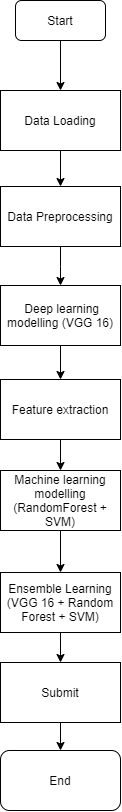




***Note : Apabila kode tidak bisa dijalankan atau lama dijalankan, lebih baik download file hasil proses kode tersebut ke virtual machine ini menggunakan kode yang diawali dengan !wget***

## Import Library yang Dibutuhkan

In [ ]:
#Data Manipulating, Algebra, Visualizating
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import math
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Image Processing
!pip install mtcnn
!pip install deepface
from deepface import DeepFace
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
import cv2 
from PIL import Image

#System
import os
import csv
from numpy import load
import glob
import zipfile
from io import BytesIO
import base64
from random import randint
from IPython.display import SVG
from IPython.core.display import display, HTML
from numpy import loadtxt


#DeepLearning
import keras
import tensorflow as tf

from keras import optimizers
import tensorflow.keras.optimizers as Optimizer
from keras.models import Sequential, Model
import tensorflow.keras.models as Models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, Input, GlobalAveragePooling2D

from keras import backend as K
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

#Preprocessing, Machine Learning, Report, etc

from imblearn.combine import SMOTETomek

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


#Others
!pip install gdown
from tqdm import tqdm #ProgressBar
!pip install ipython-autotime #Time Execution
%load_ext autotime

     |████████████████████████████████| 2.3 MB 8.3 MB/s 
     |████████████████████████████████| 61 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=4827a5e83b03869992205ae005f80b8f44fa12ea0703aa22067d2c8c4d3124bb
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
Directory  /root /.deepface created
Directory  /root /.deepface/weights created
time: 225 µs (started: 2021-10-31 11:45:42 +00:00)


# 1. Data Loading

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=12b_efQnf5h1UluLYeCQt7xULJDY5pNz4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=12b_efQnf5h1UluLYeCQt7xULJDY5pNz4" -O DatasetBDC2021.zip && rm -rf /tmp/cookies.txt

--2021-10-31 07:14:01--  https://docs.google.com/uc?export=download&confirm=SHUV&id=12b_efQnf5h1UluLYeCQt7xULJDY5pNz4
Resolving docs.google.com (docs.google.com)... 74.125.142.113, 74.125.142.139, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-34-docs.googleusercontent.com/docs/securesc/9vll0uhcqvotttqlcfrjrugh7rtlfgth/gaaa8nvb8i854mn2qvrge4mja0esqc4g/1635664425000/17539190491766931577/08366650418679355801Z/12b_efQnf5h1UluLYeCQt7xULJDY5pNz4?e=download [following]
--2021-10-31 07:14:01--  https://doc-14-34-docs.googleusercontent.com/docs/securesc/9vll0uhcqvotttqlcfrjrugh7rtlfgth/gaaa8nvb8i854mn2qvrge4mja0esqc4g/1635664425000/17539190491766931577/08366650418679355801Z/12b_efQnf5h1UluLYeCQt7xULJDY5pNz4?e=download
Resolving doc-14-34-docs.googleusercontent.com (doc-14-34-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/DatasetBDC2021.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

Folder yang dibutuhkan sudah berada pada cloud host dan siap untuk melakukan analisis

## train.csv

In [ ]:
train = pd.read_csv("train.csv")

--2021-10-31 06:00:45--  https://docs.google.com/uc?export=download&id=1Px2jr9tUxico2zxSx4tgjaR1PWUJAD6W
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.102, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ii172tinfluajl0tdme9qgs1o3qv8jro/1635660000000/06929804686349673809/*/1Px2jr9tUxico2zxSx4tgjaR1PWUJAD6W?e=download [following]
--2021-10-31 06:00:45--  https://doc-00-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ii172tinfluajl0tdme9qgs1o3qv8jro/1635660000000/06929804686349673809/*/1Px2jr9tUxico2zxSx4tgjaR1PWUJAD6W?e=download
Resolving doc-00-3o-docs.googleusercontent.com (doc-00-3o-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-00-3o-docs.googleusercontent.com (doc-00-3o-d

In [ ]:
train.head(5)

,nomor,jenis kelamin,usia
0,1,0,27
1,2,1,24
2,3,0,29
3,4,1,23
4,5,0,20


time: 25.3 ms (started: 2021-10-31 06:01:10 +00:00)


In [ ]:
train['jenis kelamin'].value_counts()

0    447
1    323
Name: jenis kelamin, dtype: int64

time: 10.4 ms (started: 2021-10-31 06:07:05 +00:00)


Pada train .csv terdapat kolom nomor yang berarti nomor folder pada folder Training, jenis kelamin dan usia yang merupakan jenis kelamin dan usia dari orang yang dianggap anchor pada folder tersebut. Jenis kelamin 0 adalah perempuan dan 1 adalah laki-laki.

Dapat dilihat bahwa jumlah perempuan lebih besar dibanding dengam jumlah laki-laki dengan perbandingan 58% dibanding 42%. Jumlah perbandingan ini akan berubah saat memasuki praproses data sesuai hasil ekstraksi yang dilakukan, permasalahan ini akan dijelaskan pada pembahasan selanjutnya

## submission.csv

In [ ]:
submission = pd.read_csv("submission.csv")

--2021-10-31 06:04:06--  https://docs.google.com/uc?export=download&id=1Ev9jmZQjprLRv1ZoAkB4hm1H7mbhfEUb
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.113, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l3dn6clgspj423ad28sk1dbm0beqqqdi/1635660225000/01342721262863808618/*/1Ev9jmZQjprLRv1ZoAkB4hm1H7mbhfEUb?e=download [following]
--2021-10-31 06:04:06--  https://doc-0c-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l3dn6clgspj423ad28sk1dbm0beqqqdi/1635660225000/01342721262863808618/*/1Ev9jmZQjprLRv1ZoAkB4hm1H7mbhfEUb?e=download
Resolving doc-0c-c0-docs.googleusercontent.com (doc-0c-c0-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0c-c0-docs.googleusercontent.com (doc-0c-c0-d

In [ ]:
submission.head(5)

,id
0,005093b2-8c4b-4ed7-91c3-f5f4d50f8d27
1,0052554e-069e-4c43-beb0-0885e8f7684e
2,0092b954-1143-4a95-a17b-1edfa6af3b01
3,009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16
4,00d0e306-06fe-45d8-ae6c-6f83ab8f7810


time: 17.3 ms (started: 2021-10-31 06:04:20 +00:00)


Pada submission.csv terdapat kolom id dimana kolom tersebut merupakan nama file yang berada pada folder Testing, kita diminta untuk membuat 1 kolom lagi yaitu "jenis kelamin" yang berisi hasil prediksi yang kita lakukan

# 2. Data Preprocessing

In [ ]:
def euclidean_distance(a, b):
	x1 = a[0]; y1 = a[1]
	x2 = b[0]; y2 = b[1]
	
	return math.sqrt(((x2 - x1) * (x2 - x1)) + ((y2 - y1) * (y2 - y1)))

In [ ]:
def distance(imgpath1,imgpath2):
  verification = DeepFace.verify(img1_path = imgpath1, img2_path = imgpath2,detector_backend = 'mtcnn')
  d=verification.get("distance")
  return d

In [ ]:
def alignment_procedure(img, left_eye, right_eye):
#this function aligns given face in img based on left and right eye coordinates
 
  left_eye_x, left_eye_y = left_eye
  right_eye_x, right_eye_y = right_eye
  
  #-----------------------
  #find rotation direction
  
  if left_eye_y > right_eye_y:
      point_3rd = (right_eye_x, left_eye_y)
      direction = -1 #rotate same direction to clock
  else:
      point_3rd = (left_eye_x, right_eye_y)
      direction = 1 #rotate inverse direction of clock
  
  #-----------------------
  #find length of triangle edges
  
  a = euclidean_distance(np.array(left_eye), np.array(point_3rd))
  b = euclidean_distance(np.array(right_eye), np.array(point_3rd))
  c = euclidean_distance(np.array(right_eye), np.array(left_eye))
  
  #-----------------------
  
  #apply cosine rule
  
  if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation
  
      cos_a = (b*b + c*c - a*a)/(2*b*c)
      angle = np.arccos(cos_a) #angle in radian
      angle = (angle * 180) / math.pi #radian to degree
  
      #-----------------------
      #rotate base image
  
      if direction == -1:
          angle = 90 - angle
  
      img = Image.fromarray(img)
      img = np.array(img.rotate(direction * angle))
  
  #-----------------------
  
  return img #return img anyway

## 2.1. Data latih

Berikut adalah alur dari data preprocessing yang akan dilakukan pada data latih:

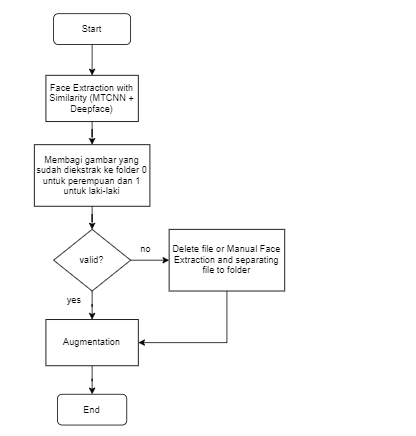

Pada setiap folder kita melakuakn ekstraksi wajah menggunakan **deketor wajah MTCNN** apabila tidak terdeteksi wajah, kita akan menghapus file tersebut, apabila terdeteksi 2 wajah atau lebih, kita menghitung kemiripan atau similaritynya menggunakan **library deepface** dengan threshold distance tertentu (kami menggunakan threshold distance<0.22) untuk menyatakan sebuah wajah mirip atau tidak. Jika mirip maka wajah akan diekstrak dan disimpan sebagai file .jpg. Untuk lebih jelasnya silahkan lihat ilustrasi dibawah (menggunakan contoh folder 23 (*hanya ilustrasi*)) :

<Figure size 432x288 with 0 Axes>

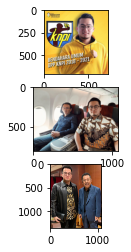

time: 794 ms (started: 2021-10-31 08:05:03 +00:00)


In [ ]:
img_23=[]
for i in range(3):
  i=i+1
  img=plt.imread("/content/Training/23/23_"+str(i)+".jpg")
  img_23.append(img)

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(img_23[0])
axarr[1].imshow(img_23[1])
axarr[2].imshow(img_23[2])


Setelah diekstraksi wajahnya, kita mendapat:

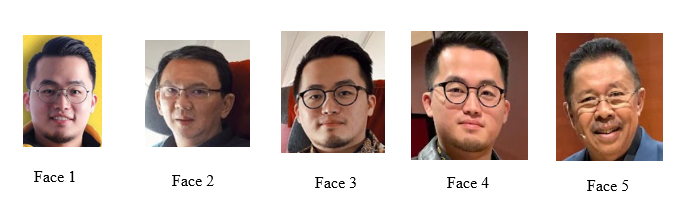

Setelah dibandingkan distancenya maka akan menghasilkan "tabel" sebagai berikut :

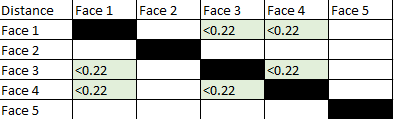

Dengan demikian, kita mengambil face 1, face 3 dan face 4 untuk data latih yang sudah diproses. Kodenya adalah sebagai berikut :

*Untuk menjalankan kode, silahkan select all (ctrl + a) pada semua kode kemudian klik ctrl+"/" dan jalankan kode*

*folder dan file sudah disesuaikan kode ini dapat dijalankan*

In [ ]:
root_train = '/content/Training/'
file_delete_train =[]
for i in tqdm(range(train.shape[0])):
  i=i+1
  try:
    os.mkdir("/content/preproses1/")
  except:
    q=1
  dirname = "/content/preproses1/"+str(i)
  try:
    os.mkdir(dirname)
  except:
    q=1
  faces_loc=[]
  y=0
  jj=[]
  for j in range(1,4):
    file_loc = root_train+str(train['nomor'][i-1])+'/'+str(train['nomor'][i-1])+'_'+str(j)+'.jpg'
    file_name = str(i)+"_"+str(j)+".jpg"
    img = cv2.imread(file_loc)
    faces = detector.detect_faces(img)
    sum_face = len(faces)
    if sum_face == 0:
      file_delete_train.append(file_name)
    elif sum_face == 1: #Diasumsikan ini foto pribadi
      A=faces[0].get('box');
      x,y,w,h = A
      crop_img = img[y:y+h, x:x+w]
      cv2.imwrite(os.path.join(dirname, file_name), np.array(crop_img))
    else:
      y=y+1
      jj.append(j)
      for f in range(sum_face):

        A=faces[f].get('box');
        x,y,w,h = A
        crop_img = img[y:y+h, x:x+w]
        temp_loc=str(j)+"_"+str(f)+".jpg"
        cv2.imwrite(temp_loc,np.array(crop_img))
        faces_loc.append(temp_loc)
  if y == 1 : #only one image detected face
      try:
        file_name = str(i)+"_"+str(jj[0])+".jpg"
        file_loc = root_train+str(train['nomor'][i-1])+'/'+str(train['nomor'][i-1])+'_'+str(jj[0])+'.jpg'
      except:
        n=0
      file_delete_train.append(file_name)
  elif y > 1:
    idx_dis_i = []
    dis = []
    idx_sim_error=[]
    for a in range(len(faces_loc)):
      for b in range (len(faces_loc)):
        if a != b :
          try:
            d=distance(faces_loc[a], faces_loc[b])
            dis.append(d)
            idx_dis_i.append(a)
          except ValueError:
            idx_sim_error.append(a)
    df = pd.DataFrame(list(zip(idx_dis_i, dis)),
               columns =['idx', 'distance'])
    df=df.sort_values('distance')
    df=df[df['distance'] < 0.22] 
    idx_sim = df["idx"].tolist()
    idx_sim = list(set(idx_sim))
    if len(idx_sim) == 0:
      if y == 2:
        for c in jj:
          file_name = str(i)+"_"+str(c)+".jpg"
          file_loc = root_train+str(train['nomor'][i-1])+'/'+str(train['nomor'][i-1])+'_'+str(c)+'.jpg'
          file_delete_train.append(file_name)
    elif len(idx_sim) >= 1 :
      g=1
      for u in idx_sim:
        img = cv2.imread(faces_loc[u])
        file_name = str(i)+"_"+str(g)+".jpg"
        cv2.imwrite(os.path.join(dirname, file_name), np.array(img))
        g=g+1
  delete = pd.DataFrame({
      "id": file_delete_train,
      })
  delete.to_csv("/content/preproses1/delete.csv", index=False)

Karena pada proses analisis kemarin menggunakan google drive maka hasil running dari kode ini berada pada google drive. Berikut adalah link foldernya :
https://drive.google.com/drive/folders/1IIH6A2hKzFQp5D1hOfKqfFUrDjbzghAI?usp=sharing

Terdapat file delete.csv yang berisikan nama file yang dihapus karena wajahnya tidak terdeteksi atau tidak memenuhi kriteria (distance < 0.22). Selanjutnya kita akan memindahkan data ke temp file :

In [ ]:
#Move to temp file
import shutil
count=0
for i in tqdm(range(train.shape[0])):
  i=i+1
  list = os.listdir('/content/preproses1/'+str(i)) # dir is your directory path
  for j in list:
    file_loc = '/content/preproses1/'+str(train['nomor'][i-1])+'/'+j
    try:
      os.mkdir("/content/train_temp/")
    except:
      q=1
    shutil.copy(file_loc,'/content/train_temp/'+j)

Karena pada proses analisis kemarin menggunakan google drive maka hasil running dari kode ini berada pada google drive. Berikut adalah link foldernya :
https://drive.google.com/drive/folders/1km4DhxhDL4SDjpe0ujBQiXmJmY8AkXom?usp=sharing

Selanjutnya kita akan melakukan mapping antara file-file tersebut sesuai dengan jenis kelamin pada train.csv, setelah itu kita akan membaginya menjadi folder 0 untuk perempuan dan 1 untuk laki-laki. Berikut adalah kodenya :

In [ ]:
#Name depan setiap file di train_temp

path='/content/train_temp/'
nomor = []
list = os.listdir(path)
for i in list:
  part = i.partition('_')
  nomor.append(part[0])

In [ ]:
gender_map = dict(zip(train['nomor'], train['jenis kelamin']))
age_map = dict(zip(train['nomor'], train['usia']))

In [ ]:
temp = pd.DataFrame(np.array(nomor),columns =["idx"])
#mapping
temp['jenis kelamin'] = temp['idx'].astype(int).map(gender_map)
temp['usia'] = temp['idx'].astype(int).map(age_map)
temp.to_csv("/content/mapping_temp.csv", index=False)

mapping_temp.csv (https://drive.google.com/file/d/1HUPa8jfven2uaj0dUDsJQQkwyN_rWxcO/view?usp=sharing)

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1HUPa8jfven2uaj0dUDsJQQkwyN_rWxcO' -O mapping_temp.csv

--2021-10-31 17:33:35--  https://docs.google.com/uc?export=download&id=1HUPa8jfven2uaj0dUDsJQQkwyN_rWxcO
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.100, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nb26j2kbdrcv8becojl9ra05j4bp30bd/1635701550000/17539190491766931577/*/1HUPa8jfven2uaj0dUDsJQQkwyN_rWxcO?e=download [following]
--2021-10-31 17:33:35--  https://doc-0s-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nb26j2kbdrcv8becojl9ra05j4bp30bd/1635701550000/17539190491766931577/*/1HUPa8jfven2uaj0dUDsJQQkwyN_rWxcO?e=download
Resolving doc-0s-b4-docs.googleusercontent.com (doc-0s-b4-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0s-b4-docs.googleusercontent.com (doc-0s-b4-d

In [ ]:
#Memisahkan file 0 untuk perempuan dan 1 untuk laki-laki
try:
  os.mkdir("/content/train_face_extract/")
except:
  q=1
try:
  os.mkdir("/content/train_face_extract/0/")
except:
  q=1
try:
  os.mkdir("/content/train_face_extract/1/")
except:
  q=1
path = '/content/train_face_extract/'
list = os.listdir(path) # dir is your directory path
for i in tqdm(range(len(list))):
  for j in range(train.shape[0]):
    nomor = train["nomor"][j]
    part = list[i].partition('_')
    if part[0] == str(nomor):
      gender = train['jenis kelamin'][nomor-1]
      #print(gender)
      if gender == 1:
        shutil.copy(path+l, '/content/train_face_extract/1/')
      elif gender == 0:
        shutil.copy(path+l, '/content/train_face_extract/0/')

Setelah itu kita melakukan checking ulang secara manual kepada 2 folder tersebut, berikut adalah hal-hal yang didapatkan :


*   Salah mendeteksi wajah
*   Terdapat 2 wajah berbeda atau lebih yang diekstrak
*   Folder yang membingungkan
*   Kesalahan labeling oleh panitia

Setelah bersih, kita akan melakukan augmentasi pada gambar


### Salah mendeteksi wajah

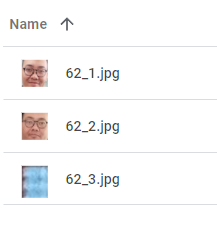


Contohnya adalah gambar dengan nama file 62_3.jpg solusinya adalah melakukan cropping manual pada data tersebut :
*   Gambar asli

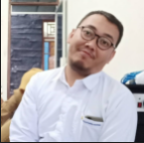


*   Gambar hasil ekstrasi dari MTCNN

62_3.jpg

*   Gambar setelah dilakukan cropping manual

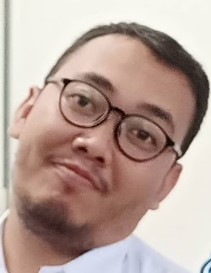

### Terdapat 2 wajah berbeda atau lebih yang diekstrak

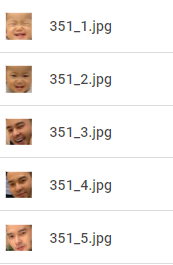

Hal ini disebabkan karena kita hanya menghitung distance, apabila distance < 0.22, maka wajah diekstrak. Pada kasus folder nomor 351 terdapat 2 wajah berbeda yang diekstrak karena algoritma menemukan 2 wajah sebagai anchor face. Solusinya adalah menghapus wajah yang tidak relevan. (Pada folder 351 ini kita akan mennghapus file 351_1.jpg dan 351_2.jpg)

### Folder yang membingungkan

Pada folder bernomor 552, terdapat hal yang membingungkan karena terdapat 2 anchor face.

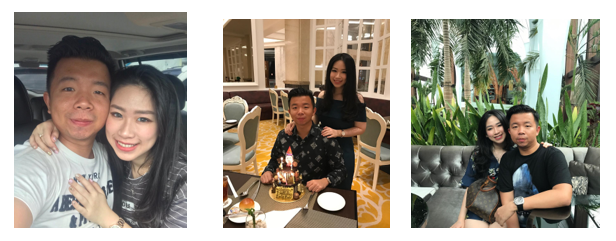

Algoritma akan mengekstrak 6 wajah dari folder tersebut

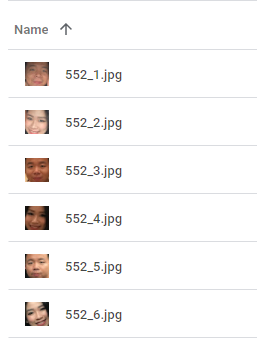

Solusinya adalah melihat train.csv dan melihat jenis kelamin dari folder bernomor 552, setelah itu didapati bahwa jenis kelamin untuk folder tersebut adalah perempuan, maka dari itu kita menghapus gambar laki-laki (552_2, 552_4, 552_6)

### Kesalahan labeling oleh panitia

Kami menemukan pada folder 118, 642, 723. Panitia melakukan kesalahan labeling. Contohnya adalah untuk folder 118, seharusnya jenis kelaminnya adalah laki-laki, namun pada train.csv tertulis bahwa jenis kelaminnya perempuan.

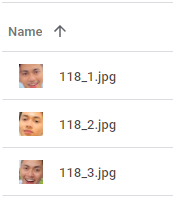

image.png


Solusinya adalah memindahkan gambar tersebut berdasarkan jenis kelamin yang sesuai, karena jika tidak dipindahkan akan sangat berpengaruh pada model.

Setelah semuanya sesuai, kami menyimpannya pada folder bernama Train_Fix_gender (https://drive.google.com/drive/folders/1xRk0PRpOAHPPJqEIXou_8-Uy9eHtIxIS?usp=sharing)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi" -O Train_Cleaned.zip && rm -rf /tmp/cookies.txt

--2021-10-31 11:24:49--  https://docs.google.com/uc?export=download&confirm=_c_M&id=1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi
Resolving docs.google.com (docs.google.com)... 74.125.197.101, 74.125.197.139, 74.125.197.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-3s-docs.googleusercontent.com/docs/securesc/m256d1e53qh2d67vqfmmnc25i5j7gqo1/p68ss783eu2ehokupqg0s0hb4dqjcefu/1635679425000/17539190491766931577/16598934148494386367Z/1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi?e=download [following]
--2021-10-31 11:24:50--  https://doc-00-3s-docs.googleusercontent.com/docs/securesc/m256d1e53qh2d67vqfmmnc25i5j7gqo1/p68ss783eu2ehokupqg0s0hb4dqjcefu/1635679425000/17539190491766931577/16598934148494386367Z/1_3kELQhIL6n1IlWYlUpVO1i5Wy1skIhi?e=download
Resolving doc-00-3s-docs.googleusercontent.com (doc-00-3s-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/Train_Cleaned.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

### Augmentasi Gambar

Augmentasi gambar dilakukan untuk menambah variasi terhadap data latih, yang dilakukan adalah  melakukan rotasi, shift, shear dan zoom serta melakukan horizontal flip. Contoh augmentasinya adalah sebagaimana berikut :

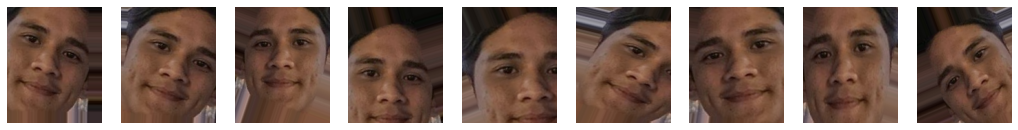

time: 726 ms (started: 2021-10-31 12:06:48 +00:00)


In [ ]:
datagen =  ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show

def plot(data_generator):
    """
    Plots 9 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=9, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()
    
image = imread("/content/Training_Fix_gender/1/100_1.jpg")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

plot(datagen)

## 2.2. Data tes

Berikut adalah alur dari praproses gambar pada data tes :

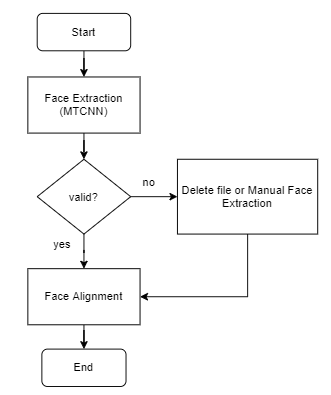

Pertama, kita akan mengurutkan data tes dan mengubah nama gambar menjadi indeks, setelah urut, kita melakukan ekstraksi wajah menggunakan MTCNN, apabila wajah salah terdeteksi atau gambar terdiri dari 2 wajah, maka kita akan mengekstrak wajah yang paling confidence dianggap wajah. Setelah itu kita melakukan face alignment dengan acuan mata, hal ini dilakukan agar semua gambar pada data tes wajahnya selaras, diharapkan dengan demikian dapat meningkatkan kualitas dari hasil prediksi.

In [ ]:
#Sorting Testing Folder
root_test = '/content/Testing/'
test=submission
test_image = []
for i in tqdm(range(test.shape[0])):
  file_loc = root_test+str(test['id'][i])+'.jpg'
  img = cv2.imread(file_loc)
  test_image.append(img)
  
X_test=np.array(test_image)

#Save Sorted Test Image
try:
  os.mkdir("/content/Testing_Urut/")
except:
  q=1
path = '/content/Testing_Urut/'
for i in tqdm(range(X_test.shape[0])):
  cv2.imwrite(path+str(i)+".jpg", X_test[i])

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS" -O Testing_Urut.zip && rm -rf /tmp/cookies.txt

--2021-10-31 17:46:25--  https://docs.google.com/uc?export=download&confirm=MS6S&id=1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS
Resolving docs.google.com (docs.google.com)... 108.177.98.101, 108.177.98.139, 108.177.98.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-0c-docs.googleusercontent.com/docs/securesc/dm5rpr1irn4tq87uh6s13jfov6vkv3ai/6c67rg94sa0js9j452h0ib7c4qqa8mai/1635702375000/17539190491766931577/16340889292641239592Z/1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS?e=download [following]
--2021-10-31 17:46:25--  https://doc-08-0c-docs.googleusercontent.com/docs/securesc/dm5rpr1irn4tq87uh6s13jfov6vkv3ai/6c67rg94sa0js9j452h0ib7c4qqa8mai/1635702375000/17539190491766931577/16340889292641239592Z/1XF_rzsOgp6jtSV1T0d6bD4Am1U9MIOvS?e=download
Resolving doc-08-0c-docs.googleusercontent.com (doc-08-0c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/Testing_Urut.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

time: 1.72 s (started: 2021-10-31 17:46:43 +00:00)


File dari hasil pengurutan tersebut dapat dilihat pada (https://drive.google.com/drive/folders/1Nmt7shbLBbGf0cCSxAg7l050GUprPB_Y?usp=sharing). 

Setelah itu kita melakukan ekstraksi wajah menggunakan MTCNN, jika tidak bisa kita menggunakan library deepFace dengan beckendnya adalah MTCNN juga kemudian menyimpannya pada folder Test_Cropped_x. 

Berikut adalah kodenya :

In [ ]:
try:
  os.mkdir("/content/Test_Cropped_x/")
except:
  q=1
from tqdm import tqdm
import math
for i in tqdm(range(submission.shape[0])):
  path="/content/Testing_Urut/"+str(i)+".jpg"
  img = cv2.imread(path)
  detector = MTCNN()
  faces = detector.detect_faces(img)
  sum_face = len(faces)
  if sum_face == 0:
    try:
      aligned_face = DeepFace.detectFace(path)
      resized_image = cv2.resize(aligned_face, (224, 224))
      plt.imsave("/content/Test_Cropped_x/"+str(i)+".jpg",resized_image)
    except:
      resized_image = cv2.resize(img, (224, 224))
      resized_image=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
      plt.imsave("/content/Test_Cropped_x/"+str(i)+"_manual.jpg",resized_image)
  else:
    detector = MTCNN()
    faces = detector.detect_faces(img)

    A=faces[0].get('box');
    x,y,w,h = A
    image = img[y:y+h, x:x+w]

    resized_image = cv2.resize(image, (224, 224))
    resized_img=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    resized_image=img_to_array(resized_img) 

    plt.imsave("/content/Test_Cropped_x/"+str(i)+".jpg",resized_img)

Hasil dari ekstraksi wajah tersebut dapat dilihat pada (https://drive.google.com/drive/folders/1cdM7v7udwHwPyrgYZuYNKjDXlOFYl0qD?usp=sharing).

*   Terdapat penambahan "_manual.jpg" di nama gambar, hal ini menandakan bahwa gambar tersebut harus diekstrak/dicrop wajahnya secara manual karena pada gambar tersebut wajahnya tidak terdeteksi.

*   Selain wajah tidak terdeteksi, terdapat juga kesalahan ekstraksi wajah seperti data latih, jika terjadi demikian, kita akan melakukan cropping wajah secara manual.

*   Jika terdapat 2 wajah maka kita mengambil wajah yang paling confidence dianggap wajah, namun untuk prediksi, akan dibahas pada pembahasan selanjutnya.

Gambar yang sudah bersih dapat dilihat pada folder (https://drive.google.com/drive/folders/1zLG8Bzz3lIUWygy01hvmLOxSrOwzDD63?usp=sharing)


Tahapan terakhir adalah melakukan alignment terhadap wajah yang sudah diekstrak dan dibersihkan secara manual (yang berada pada folder Testing_Fix)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE" -O Testing_Fix.zip && rm -rf /tmp/cookies.txt

--2021-10-31 13:31:39--  https://docs.google.com/uc?export=download&confirm=&id=1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.139, 74.125.195.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-0s-docs.googleusercontent.com/docs/securesc/7s26ue9cl7u10tpp9ogjtlndkbe8c3t7/2pucik3dbam4fqh3aj9vdddjk96bfufa/1635687075000/17539190491766931577/07180216207321035192Z/1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE?e=download [following]
--2021-10-31 13:31:41--  https://doc-08-0s-docs.googleusercontent.com/docs/securesc/7s26ue9cl7u10tpp9ogjtlndkbe8c3t7/2pucik3dbam4fqh3aj9vdddjk96bfufa/1635687075000/17539190491766931577/07180216207321035192Z/1pmJHZwEIYX0jBW50ZMrBPmKt15SIdwSE?e=download
Resolving doc-08-0s-docs.googleusercontent.com (doc-08-0s-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to 

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/Testing_Fix.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

time: 212 ms (started: 2021-10-31 13:33:01 +00:00)


In [ ]:
from tqdm import tqdm
import math
from PIL import Image

try:
  os.mkdir("/content/Test_Face_Align/")
except:
  q=1

for i in tqdm(range(submission.shape[0])):
  try:
    path = "/content/Testing_Fix/"+str(i)+".jpg"
    img = cv2.imread(path)
  except FileNotFoundError:
    path = "/content/Testing_Fix/"+str(i)+".png"
    img = cv2.imread(path)
    cv2.imwrite('temp.jpg',img)
    img = cv2.imread('temp.jpg')
  faces = detector.detect_faces(img)
  detector = MTCNN()
  sum_face = len(faces)
  if sum_face == 0:
    cv2.imwrite("/content/Test_Face_Align/"+str(i)+".jpg",img)
  else:
    keypoints = faces[0].get('keypoints')
    left_eye = keypoints.get('left_eye')
    right_eye = keypoints.get('right_eye')
    imag = alignment_procedure(img, left_eye, right_eye)
    cv2.imwrite("/content/Test_Face_Align/"+str(i)+".jpg",imag)

Folder Test_Face_Align yang akan digunakan sebagai inputan dari data tes dapat dilihat di https://drive.google.com/drive/folders/1LFFOvsou1Lm_4GETb4y4w_DDw6q-csM8?usp=sharing



In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=14GytLxvd1lw9bl-h6loHtMrx1R8MN6Wr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=14GytLxvd1lw9bl-h6loHtMrx1R8MN6Wr" -O Test_Face_Align.zip && rm -rf /tmp/cookies.txt

--2021-10-31 16:53:48--  https://docs.google.com/uc?export=download&confirm=&id=14GytLxvd1lw9bl-h6loHtMrx1R8MN6Wr
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.101, 74.125.195.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2k-docs.googleusercontent.com/docs/securesc/dgu1unbeid18ej07mhlcegm14cl37se0/mrffcf2lqt0u603hi8hkjnfv1keka2ii/1635699225000/17539190491766931577/06353325445129659659Z/14GytLxvd1lw9bl-h6loHtMrx1R8MN6Wr?e=download [following]
--2021-10-31 16:53:49--  https://doc-08-2k-docs.googleusercontent.com/docs/securesc/dgu1unbeid18ej07mhlcegm14cl37se0/mrffcf2lqt0u603hi8hkjnfv1keka2ii/1635699225000/17539190491766931577/06353325445129659659Z/14GytLxvd1lw9bl-h6loHtMrx1R8MN6Wr?e=download
Resolving doc-08-2k-docs.googleusercontent.com (doc-08-2k-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to 

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/Test_Face_Align.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

time: 218 ms (started: 2021-10-31 16:54:18 +00:00)


# 3. Deep Learning Modelling (VGG 16)

Setidaknya terdapat 2 kegunaan untuk deep learning modelling ini : 
*   Memodelkan jenis kelamin dari gambar 
*   Melakukan ekstraksi fitur dari gambar menjadi vektor yang nantinya akan digunakan pada Machine Learning Modelling

Ada beberapa tahap pada Deep Learning Modelling ini :
*   Melakukan split data latih 80% sebagai data latih dan 20%nya sebagai data test (maksudnya data validasi)
*   Membuat Arsitektur Deep Learning
*   Melatih Model
*   Visualisasi Hasil Latih Model
*   Melihat Skor Validasi dari Model

## 3.1. Melakukan split data latih 80% sebagai data latih dan 20%nya sebagai data test (maksudnya data validasi)

In [ ]:
train_path = '/content/Training_Fix_gender/'

#Dilakukan Augmentasi Terlebih Dahulu
augmentation =  ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  validation_split=0.2
)

train_data = augmentation.flow_from_directory(
        train_path,  
        target_size=(224,224),
        batch_size=64,
        class_mode='categorical',
        subset='training')

test_data = augmentation.flow_from_directory(
        train_path,  
        target_size=(224,224),
        batch_size=64,
        class_mode='categorical',
        subset='validation')

## 3.2. Membuat Arsitektur Deep Learning

Kita menggunakan arsitektur Convolutional Neural Network VGG 16. VGG 16 adalah arsitektur yang digunakan pada imagenet competition pada tahun 2014 dan keluar sebagai pemenang atau arsitektur terbaik pada kompetisi tersebut. VGG 16 memiliki 5 blok konvolusi dan 3 lapisan yang terhubung penuh. Setiap blok terdiri dari 2 atau lebih lapisan Convolutional dan lapisan Max Pool. Input gambar yang dibutuhkan pada model ini adalah berukuran 224 x 224. Sementara outputnya bisa disesuaikan dengan banyaknya kelas yang akan diprediksi. (Dalam kasus ini 2). Berikut adalah arsitektur dari VGG 16 :

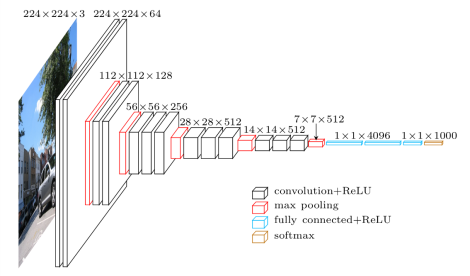

Kita mengganti output 1000 kelas menjadi 2 kelas pada pemodelan kali ini. Kita akan membuat arsitektur yang kita merahi pada gambar di bawah ini :

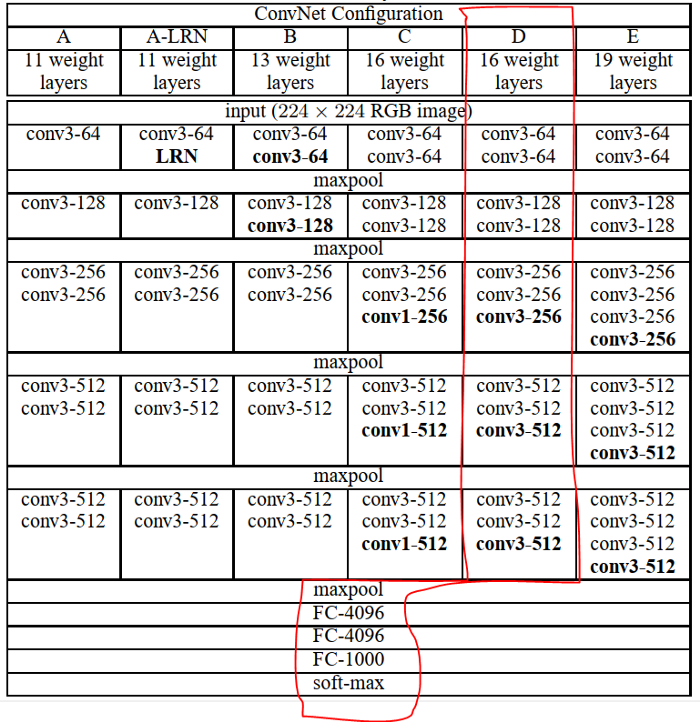

In [ ]:
#Vgg 16
#import necessary layers

from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

# input  
input = Input(shape =(224,224,3))

# 1st Conv Block
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 2nd Conv Block
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 3rd Conv block  
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 4th Conv block
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# Fully connected layers  
x = Flatten()(x) 
x = Dense(units = 4096, activation ='relu')(x) 
x = Dense(units = 4096, activation ='relu')(x) 
x = Dropout(0.5)(x)
output = Dense(units = 2, activation ='softmax')(x)

# creating the model
model = Model (inputs=input, outputs =output)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0   

### Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) adalah sebuah algoritma untuk menemukan nilai
minimum lokal dari sebuah fungsi. Stochastic Gradient Descent (SGD) berguna untuk mengoptimalkan fungsi objektif dengan properti kehalusan yang sesuai. Ini dapat dianggap sebagai pendekatan stokastik dari pengoptimalan penurunan gradien, karena ia menggantikan gradien aktual dengan perkiraannya. Terutama dalam masalah optimasi dimensi tinggi ini mengurangi beban komputasi, mencapai iterasi yang lebih cepat untuk tingkat konvergensi yang lebih rendah. *(Bottou, Léon; Bousquet, Olivier (2012). "The Tradeoffs of Large Scale Learning". In Sra, Suvrit; Nowozin, Sebastian; Wright, Stephen J. (eds.). Optimization for Machine Learning. Cambridge: MIT Press. pp. 351–368. ISBN 978-0-262-01646-9.)*

Kita menggunakan Stochastic Gradient Descent (SGD) dalam optimasi model untuk mencegah terjadinya overfitting. Kita menggunakan learning_rate = 0.001 dan momentum = 0.9 dalam pemodelan kali ini.

Untuk menghitung loss, kita menggunakan categorical_crossentropy dan untuk metriks kita menggunakan akurasi.

Kode dapat dilihat dibawah :

In [ ]:
# Menentukan metriks dan metode optimasi

from tensorflow.keras.optimizers import SGD

opt = SGD(lr = 0.001, momentum = 0.9, decay = 0)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

### Callbacks

Metode callbacks digunakan untuk mengontrol model saat pelatihan model menggunakan deep learning sedang berlangsung. Kita menggunakan ModelCheckPoint untuk mendapatkan model terbaik, kemudian kita simpan model tersebut pada file model_VGG_200.h5

In [ ]:
#Menggunakan metode callback ModelCheckpoint
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(monitor='val_loss',
                               filepath='/content/model_VGG_200.h5', 
                               verbose=1, 
                               save_best_only=True)

## 3.3 Melatih Model

Pada tahap pertama, kita akan melatih model dengan 200 epochs (200 iterasi, pada proses ini kita sangat membutuhkan waktu yang lama [+- 3 jam]). Setelah itu kita load model yang sudah ada, kemudian melatihnya kembali dengan 100 epochs dan memperkecil learning_rate menjadi 0.0001.

***Kami sama sekali tidak menggunakan metode transfer learning atau pre-trained model dari data di luar data latih yang diberikan oleh panitia, seperti transfer learning/pre trained model dengan bobot 'imagenet'.***

In [ ]:
trained = model.fit(
    train_data,  
    epochs=200,
    validation_data=test_data,
    callbacks=[checkpointer])

Hasil terbaik dari pelatihan model pertama adalah sebagai berikut :

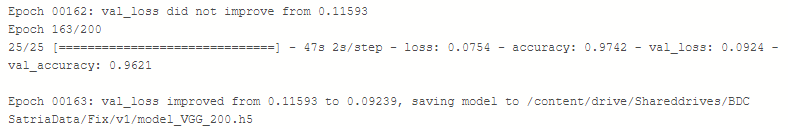

file model_VGG_200.h5 dapat dilihat di https://drive.google.com/file/d/1yah7BEVq7oMcQlUPCBv2-XEZlgUumZv4/view?usp=sharing

In [ ]:
#Mendownload model yang sudah dilatih #1
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yah7BEVq7oMcQlUPCBv2-XEZlgUumZv4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1yah7BEVq7oMcQlUPCBv2-XEZlgUumZv4" -O model_VGG_200.h5 && rm -rf /tmp/cookies.txt

--2021-10-31 14:20:45--  https://docs.google.com/uc?export=download&confirm=WjdZ&id=1yah7BEVq7oMcQlUPCBv2-XEZlgUumZv4
Resolving docs.google.com (docs.google.com)... 74.125.142.138, 74.125.142.101, 74.125.142.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-70-docs.googleusercontent.com/docs/securesc/offul4moig102r2pa4rmji46hmmejss4/h9ni10tf6284pepv2v6nq5hqkhn1no2f/1635690000000/17539190491766931577/15122542261854046702Z/1yah7BEVq7oMcQlUPCBv2-XEZlgUumZv4?e=download [following]
--2021-10-31 14:20:46--  https://doc-0g-70-docs.googleusercontent.com/docs/securesc/offul4moig102r2pa4rmji46hmmejss4/h9ni10tf6284pepv2v6nq5hqkhn1no2f/1635690000000/17539190491766931577/15122542261854046702Z/1yah7BEVq7oMcQlUPCBv2-XEZlgUumZv4?e=download
Resolving doc-0g-70-docs.googleusercontent.com (doc-0g-70-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

Selanjutnya kita meload model tersebut untuk dilatih kembali dan menyimpannya pada model_VGG_200_tl.h5 :

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/model_VGG_200.h5')

In [ ]:
checkpointer = ModelCheckpoint(monitor='val_loss',
                               filepath='/content/model_VGG_200_tl.h5', 
                               verbose=1, 
                               save_best_only=True)

In [ ]:
trained = model.fit(
    train_data,  
    epochs=100,
    validation_data=test_data,
    callbacks=[checkpointer])

Hasil terbaik dari pelatihan model kedua yang merupakan lanjutan dari pelatihan model pertama adalah sebagai berikut :

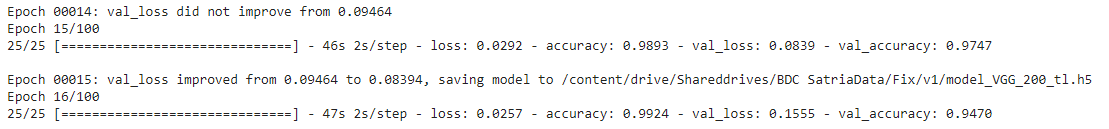

In [ ]:
file model_VGG_200_tl.h5 dapat dilihat di https://drive.google.com/file/d/1Clp9OBKr9bomeKZIiOjFsboxDXxD6fFa/view?usp=sharing

In [ ]:
#Mendownload model yang sudah dilatih #2
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Clp9OBKr9bomeKZIiOjFsboxDXxD6fFa' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Clp9OBKr9bomeKZIiOjFsboxDXxD6fFa" -O model_VGG_200_tl.h5 && rm -rf /tmp/cookies.txt


--2021-10-31 14:33:22--  https://docs.google.com/uc?export=download&confirm=QdH4&id=1Clp9OBKr9bomeKZIiOjFsboxDXxD6fFa
Resolving docs.google.com (docs.google.com)... 74.125.199.101, 74.125.199.102, 74.125.199.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.199.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ag-docs.googleusercontent.com/docs/securesc/sjfsvf12gi67dnl57g1v4ttv9pl2ugta/b3a24vg91ghm0vnoufnbkmd49pef8rju/1635690750000/17539190491766931577/07596719514112421858Z/1Clp9OBKr9bomeKZIiOjFsboxDXxD6fFa?e=download [following]
--2021-10-31 14:33:22--  https://doc-08-ag-docs.googleusercontent.com/docs/securesc/sjfsvf12gi67dnl57g1v4ttv9pl2ugta/b3a24vg91ghm0vnoufnbkmd49pef8rju/1635690750000/17539190491766931577/07596719514112421858Z/1Clp9OBKr9bomeKZIiOjFsboxDXxD6fFa?e=download
Resolving doc-08-ag-docs.googleusercontent.com (doc-08-ag-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

## 3.4. Visualisasi Hasil Latih Model

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

Hasil pelatihan model yang telah dilakukan adalah sebagai berikut : (*ini adalah visualisasi saat pelatihan pertama)*

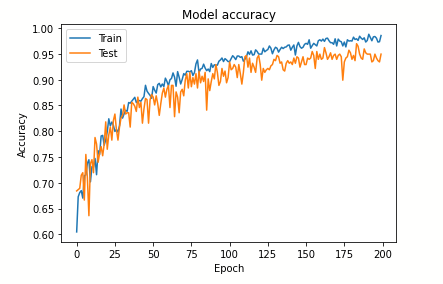

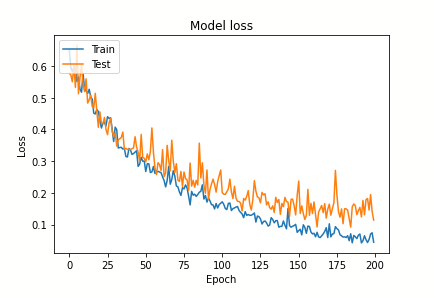


Visualisasi saat pelatihan kedua tidak dapat ditampilkan karena runtime disconnected saat epochs ke 82

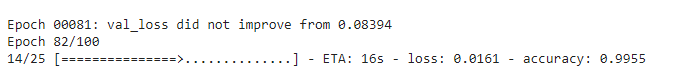

Dari hasil pelatihan model deep learning (setelah 2 kali pelatihan) didapatkan :

*  loss: 0.0292 
*  accuracy: 0.9893 
*  val_loss: 0.0839 
*  val_accuracy: 0.9747

model tersebut disimpan pada file model_VGG_200_tl.h5. Model tersebut akan digunakan untuk mengekstrak fitur dari gambar, untuk nantinya akan dilatih menggunakan machine learing.

## 3.5 Memprediksi Data Tes

In [ ]:
#Memprediksi data tes menggunakan VGG 16

#Load Model
from tensorflow import keras
model_VGG = keras.models.load_model('/content/model_VGG_200_tl.h5')

from tqdm import tqdm
predict_gender=[]
pred_VGG=[]
for i in tqdm(range(submission.shape[0])):
  try:
    path = "/content/Test_Face_align/"+str(i)+".jpg"
    image=load_img(path, target_size=(224,224))
  except FileNotFoundError:
    path = "/content/Test_Face_align/"+str(i)+".png"
    image=load_img(path, target_size=(224,224))

  image=img_to_array(image) 
  #image=image/255.0

  prediction_image=np.array(image)
  prediction_image= np.expand_dims(image, axis=0)

  reverse_mapping={0:'Perempuan',1:'Laki-laki'}

  def mapper(value):
      return reverse_mapping[value]

  prediction=model_VGG.predict(prediction_image)
  pred_VGG.append(prediction)
  value=np.argmax(prediction)
  predict_gender.append(value)

#pred_VGG mengahsilkan output probabilitas apakah sebuah gambar laki-laki atau perempuan
#pred_VGG akan digunakan pada ensemble learning

# 4. Machine Learning Modelling (SVM dan RandomForest)

Pada pemodelan kali ini kita akan menggunakan 2 algoritma machine learning untuk klasifikasi, yaitu RandomForestClassifier dan Support Vector Machine (SVM). Hal yang akan dibahas pada bab ini adalah :
*   Input Data Latih dan Data Tes
*   Ekstrak Data Latih Data Tes
*   Handling Imbanlace Data Latih (SMOTETomek)
*   Support Vector Machine
*   RandomForest


## 4.1. Input Data Latih dan Data Tes

In [ ]:
#Data Latih
print(os.listdir("/content/"))

SIZE = 224  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("/content/Training_Fix_gender/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
y_train = le.transform(train_labels)

In [ ]:
#Data Tes
from tqdm import tqdm
test_images=[]
for i in tqdm(range(submission.shape[0])):
  try:
    path = "/content/Test_Face_Align/"+str(i)+".jpg"
    image=load_img(path, target_size=(224,224))
  except FileNotFoundError:
    path = "/content/Test_Face_Align/"+str(i)+".png"
    image=load_img(path, target_size=(224,224))

  image=img_to_array(image) 
  test_images.append(image)

## 4.2. Ekstrak Data Latih Data Tes

In [ ]:
#Load model without classifier/fully connected layers
base_model = tensorflow.keras.models.load_model('/content/model_VGG_200_tl.h5')
VGG_model = Model(inputs=base_model.input, outputs=base_model.get_layer('max_pooling2d_10').output)

#Make loaded layers as non-trainable
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

In [ ]:
#Scalling in pixels
x_train, x_test = np.array(x_train) / 255.0, np.array(x_test)/ 255.0

In [ ]:
#Extract Train Data Features
feature_extractor=VGG_model.predict(x_train)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_training = features #This is our X input to ML

In [ ]:
#Extract Test Data Features
X_test_feature = VGG_model.predict(np.array(x_test))
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1) #This is our X input to predict in ML

## 4.3. Handling Imbalance Data Latih (SMOTETomek)

In [ ]:
mapping = pd.read_csv("/content/mapping_temp.csv")
mapping["jenis kelamin"].value_counts()

0    1187
1     810
Name: jenis kelamin, dtype: int64

time: 15.9 ms (started: 2021-10-31 17:36:08 +00:00)


Terjadi Imbalance pada data latih maka dari itu kita akan melakukan oversampling dengan menambah sampel data menggunakan SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_for_training, y_train = smt.fit_sample(X_for_training, y_train)

In [ ]:
#Mendownload data train yang sudah diekstrak dan dihandle imbalancenya
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-A-Oa7L2DJBegDe31A0lq9MZEWAws3IU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-A-Oa7L2DJBegDe31A0lq9MZEWAws3IU" -O X_train_smote.npz && rm -rf /tmp/cookies.txt

--2021-10-31 16:16:50--  https://docs.google.com/uc?export=download&confirm=o9ag&id=1-A-Oa7L2DJBegDe31A0lq9MZEWAws3IU
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.138, 74.125.195.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-64-docs.googleusercontent.com/docs/securesc/608qprtjs6co00b892amu7cdt5vi4o6d/pp95op7rvus6cogf6s1uac6cu0jf5l5q/1635696975000/17539190491766931577/03764294921144520607Z/1-A-Oa7L2DJBegDe31A0lq9MZEWAws3IU?e=download [following]
--2021-10-31 16:16:50--  https://doc-04-64-docs.googleusercontent.com/docs/securesc/608qprtjs6co00b892amu7cdt5vi4o6d/pp95op7rvus6cogf6s1uac6cu0jf5l5q/1635696975000/17539190491766931577/03764294921144520607Z/1-A-Oa7L2DJBegDe31A0lq9MZEWAws3IU?e=download
Resolving doc-04-64-docs.googleusercontent.com (doc-04-64-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

In [ ]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('/content/X_train_smote.npz')
# extract the first array
X_for_training = dict_data['arr_0']

In [ ]:
#y_train
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-Bj9x3rfgTkw9Eaz4jUROLWoQXLZzgHc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-Bj9x3rfgTkw9Eaz4jUROLWoQXLZzgHc" -O y_train_smote.npz && rm -rf /tmp/cookies.txt

--2021-10-31 16:19:51--  https://docs.google.com/uc?export=download&confirm=&id=1-Bj9x3rfgTkw9Eaz4jUROLWoQXLZzgHc
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.100, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-84-docs.googleusercontent.com/docs/securesc/6dpu2akha7vii9il3s9v1aa6094o33r0/vh10q8cujlnarb1r5fona4pfl989714j/1635697125000/17539190491766931577/01123814900858103473Z/1-Bj9x3rfgTkw9Eaz4jUROLWoQXLZzgHc?e=download [following]
--2021-10-31 16:19:52--  https://doc-08-84-docs.googleusercontent.com/docs/securesc/6dpu2akha7vii9il3s9v1aa6094o33r0/vh10q8cujlnarb1r5fona4pfl989714j/1635697125000/17539190491766931577/01123814900858103473Z/1-Bj9x3rfgTkw9Eaz4jUROLWoQXLZzgHc?e=download
Resolving doc-08-84-docs.googleusercontent.com (doc-08-84-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to 

In [ ]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('/content/y_train_smote.npz')
# extract the first array
y_train = dict_data['arr_0']

## 4.4. Support Vector Machine

Pertama kita akan melakukan hyperparameter tuning terlebih dahulu dalam menentukan parameter terbaik untuk melatih model Support Vector Machine ini, beriku adalah kodenya :


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_for_training, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Parameter terbaiknya adalah sebagai berikut :

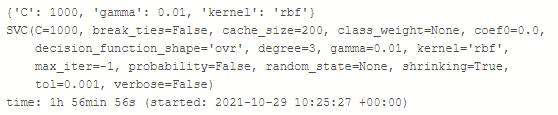

In [ ]:
#Melatih Model SVM
weights = {0:802, 1:1181} #Bobot berdasarkan jumlah laki-laki perempuan hasil praproses data latih, bersifat eksperimental

model = SVC(C=1000, break_ties=False, cache_size=200, class_weight=weights, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

model.fit(X_for_training, y_train)

In [ ]:
#Mencoba memprediksi data latih sendiri
prediction_ = model.predict(X_for_training)
target_names = ['Perempuan','Laki-laki']
print(classification_report(y_train, prediction_, target_names=target_names))

Didapat metriks sebagai berikut :

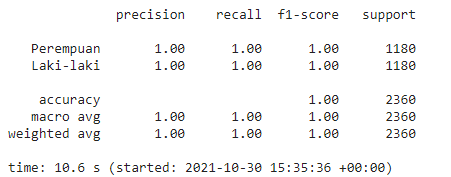



In [ ]:
#Memprediksi data tes dengan output sebagai probabilitas dari dua kelas laki-laki dan perempuan
pred_svm = model.predict_proba(X_test_features) 

## 4.5. RandomForest

Pertama kita juga akan melakukan hyperparameter tuning pada model RandomForest, yang berguna untuk mengetahui parameter terbaik dalam melatih model RandomForest ini. Berikut adalah kodenya :


In [ ]:
#RandomForest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_for_training, y_train)

print(grid_search.best_estimator_)

Didapat parameter terbaik adalah 

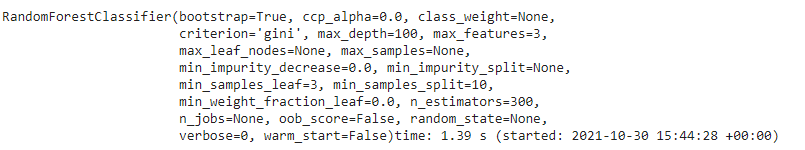

In [ ]:
#Melatih Model RandomForest
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(X_for_training,y_train)

In [ ]:
#Mencoba memprediksi data latih sendiri
yy=rf.predict(X_for_training)
target_names = ['Perempuan','Laki-laki']
print(classification_report(y_train, yy, target_names=target_names))

Didapat metriks evaluasinya sebagai berikut :


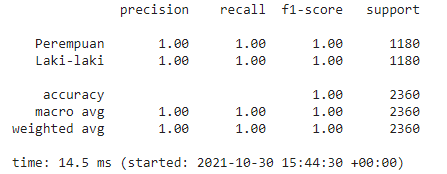

In [ ]:
#Memprediksi data tes dengan output sebagai probabilitas dari dua kelas laki-laki dan perempuan
pred_rf = rf.predict_proba(X_test_features)

Dari ketiga model yang akan digunakan sebagai Ensemble Learning, didapat nilai akurasi untuk memprediksi data latih sendiri adalah sebagai berikut :
*  VGG 16 : 0.9893
*  SVM : 1.0000
*  RandomForest : 1.000

Ketiga model tersebut harusnya tidak overfitting karena :
*   Untuk VGG 16 kita dapat melihat bahwa visualisasi dari model tidak menunjukan adanya overfitting yang parah
*   Untuk SVM dan RandomForest seharusnya tidak overfitting karena saat melakukan Hyperparameter Tuning, sudah menggunakan cross-validation. Melatih sebagian data latih dan memprediksi sebagian yang lain.



# 5. Ensemble Learning and Predicting (SoftVoting)

Kita sudah memprediksi probabilitas laki=laki atau perempuan dari data tes menggunakan 3 model yang berbeda. Pada tahapan ini kita akan melakukan soft voting. Diharapkan dengan melakukan metode ensemble, ketiga model tersebut dapat saling mengoreksi sehingga dapat meingkatkan F1_Score.

Ilustrasi dari tahap ini adalah sebagai berikut :

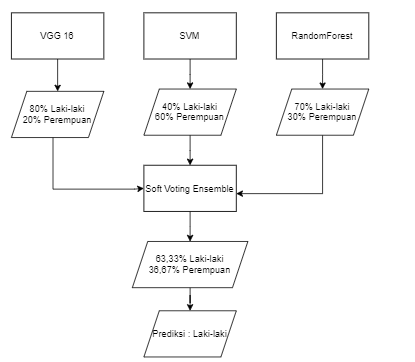

In [ ]:
#SoftVoting
true_predict=[]
for i in range(submission.shape[0]):
  fm = (pred_svm[i][0]+(pred_VGG[i][0][0])+pred_rf[i][0])/3
  ml = (pred_svm[i][1]+(pred_VGG[i][0][1])+pred_rf[i][1])/3
  if fm > ml:
    true_predict.append(0)
  else:
    true_predict.append(1)

## DoubleFace pada Data Tes

Sebelumnya kita menelusuri secara manual dari data tes, mana saja yang memiliki 2 wajah atau lebih berbeda jenis kelamin. Kemudian mencatatnya pada file DoubleFace.csv

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PgYBteqpd1z3KekW3Fk2Ef8VfIKIBEjp' -O Test_DoubleFace_idx.csv

--2021-10-31 17:15:03--  https://docs.google.com/uc?export=download&id=1PgYBteqpd1z3KekW3Fk2Ef8VfIKIBEjp
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.113, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dedu8t4so42bd5bsukqm5d2nbn6mkbvc/1635700500000/17539190491766931577/*/1PgYBteqpd1z3KekW3Fk2Ef8VfIKIBEjp?e=download [following]
--2021-10-31 17:15:03--  https://doc-00-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dedu8t4so42bd5bsukqm5d2nbn6mkbvc/1635700500000/17539190491766931577/*/1PgYBteqpd1z3KekW3Fk2Ef8VfIKIBEjp?e=download
Resolving doc-00-b4-docs.googleusercontent.com (doc-00-b4-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-00-b4-docs.googleusercontent.com (doc-00-b4-d

In [ ]:
DoubleFace = pd.read_csv("/content/Test_DoubleFace_idx.csv")

Untuk menghandle double face pada data tes, kita akan mengekstrak semua wajah yang ada pada gambar tersebut, kemudian memprediksinya menggunakan kombinasi 3 model di atas. Output dari gambar yang mempunyai 2 wajah berbeda jenis kelamin adalah yang mempunyai probabilitas terbesar. Untuk lebih jelasnya simak ilustrasi berikut :

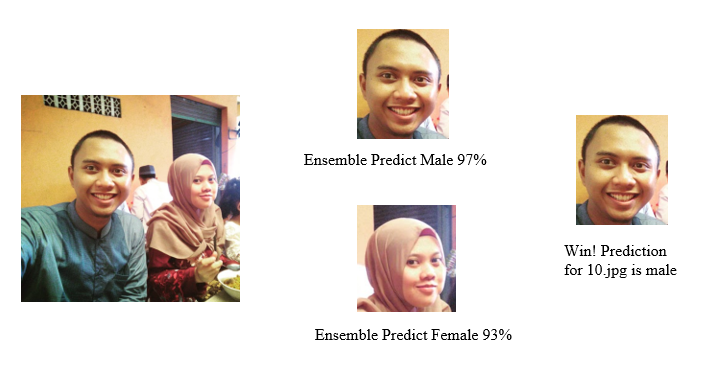

In [ ]:
from tqdm import tqdm
k=0
p=0
hmm=[]
for i in tqdm(range(DoubleFace.shape[0])):
  i=DoubleFace.idx[i]
  path="/content/Testing_Urut/"+str(i)+".jpg"
  img = cv2.imread(path)
  detector = MTCNN()
  faces = detector.detect_faces(img)
  sum_face = len(faces)
  if sum_face == 0:
    p=p+1
  else:
    k=k+1
    output=[]
    detector = MTCNN()
    faces = detector.detect_faces(img)
    for f in range(len(faces)):
      A=faces[f].get('box');
      x,y,w,h = A
      image = img[y:y+h, x:x+w]

      resized_image = cv2.resize(image, (224, 224))
      cv2.imwrite('temp.jpg',image)
      resized_image=cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
      resized_image=img_to_array(resized_image) 

      image=load_img('temp.jpg', target_size=(224,224))
      image=img_to_array(image)
      image= np.expand_dims(image, axis=0)
      
      x_test=np.array(image)/ 255.0
      X_test_feature = VGG_model.predict(np.array(x_test))
      X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
      prob_svm = model.predict_proba(X_test_features)
      prob_rf = rf.predict_proba(X_test_features)

      prediction_image=np.array(resized_image)
      prediction_image= np.expand_dims(prediction_image, axis=0)
      prediction=model_VGG.predict(prediction_image)

      female = (prediction[0][0] + prob_svm[0][0] + prob_rf[0][0])/3
      male = (prediction [0][1] + prob_svm[0][1] + prob_rf[0][1])/3
      output.append(female)
      output.append(male)
    idx = np.argmax(output)
    hmm.append(i)
    if (idx % 2) == 0:
      true_predict[i]=0
    else :
      true_predict[i]=1

# 6. Melakukan Submisi

In [ ]:
submission["jenis kelamin"] = true_predict
submission.to_csv("/content/submission.csv", index=False)

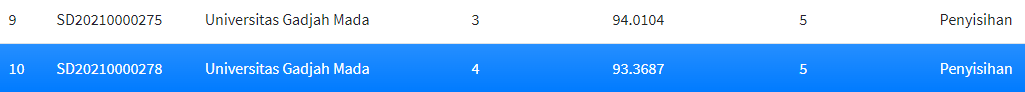

Setelah submit ke website satria data, kita mendapatkan nilai F1_Score = 0.933687

Terlihat ada sedikit overfitting, kita berhipotesis bahwa sebabnya adalah karena tahap praproses data latih yang belum sempurna.

Untuk semifinal, kita akan mengulang praproses data pada data latih salah satunya adalah dengan menambahkan face alignment. Diharapkan kualitas model yang dibuat menjadi lebih baik.